## Pandas

In [1]:
import pandas as pd

### Series

In [2]:
S = pd.Series([11, 28, 72, 3, 5, 8])
S

0    11
1    28
2    72
3     3
4     5
5     8
dtype: int64

In [3]:
fruits = ['oranges', 'apples', 'peaches', 'grapefruits']
quantities = [17, 11, 46, 12]
S = pd.Series(quantities, index=fruits)
S

oranges        17
apples         11
peaches        46
grapefruits    12
dtype: int64

In [4]:
fruits = ['oranges', 'apples', 'peaches', 'grapefruits']
S = pd.Series([17, 11, 46, 12], index=fruits)

print(S['oranges'], end='\n\n')
print(S[['oranges', 'peaches']], end='\n\n')

fruits2 = ['blueberries', 'oranges', 'apples', 'peaches']
S2 = pd.Series([7, 2, 11, 12], index=fruits2)
print(S + S2)

17

oranges    17
peaches    46
dtype: int64

apples         22.0
blueberries     NaN
grapefruits     NaN
oranges        19.0
peaches        58.0
dtype: float64


In [5]:
S = pd.Series([7, 2, 28, 19, 42])
print((S + 3) * 4, end='\n\n')

print(S.apply(lambda x: x if x > 25 else x + 25), end='\n\n')

print(S[S > 40], end='\n\n')

0     40
1     20
2    124
3     88
4    180
dtype: int64

0    32
1    27
2    28
3    44
4    42
dtype: int64

4    42
dtype: int64



### Проверка значений на missing

In [6]:
cities = {"London":   8615246, 
          "Berlin":   3562166, 
          "Madrid":   3165235, 
          "Rome":     2874038, 
          "Paris":    2273305, 
          "Vienna":   1805681, 
          "Bucharest":1803425, 
          "Hamburg":  1760433,
          "Budapest": 1754000,
          "Warsaw":   1740119,
          "Barcelona":1602386,
          "Munich":   1493900,
          "Milan":    1350680}

selected_cities = ["London", "Paris", "Zurich", "Berlin", "Stuttgart", "Hamburg"]
selected_city_series = pd.Series(cities, index=selected_cities)
print(selected_city_series, end='\n\n')

print(selected_city_series.isnull(), end='\n\n')

print(selected_city_series.dropna(), end='\n\n')

print(selected_city_series.fillna(0), end='\n\n')

London       8615246.0
Paris        2273305.0
Zurich             NaN
Berlin       3562166.0
Stuttgart          NaN
Hamburg      1760433.0
dtype: float64

London       False
Paris        False
Zurich        True
Berlin       False
Stuttgart     True
Hamburg      False
dtype: bool

London     8615246.0
Paris      2273305.0
Berlin     3562166.0
Hamburg    1760433.0
dtype: float64

London       8615246.0
Paris        2273305.0
Zurich             0.0
Berlin       3562166.0
Stuttgart          0.0
Hamburg      1760433.0
dtype: float64



### DataFrame

In [7]:
cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}
city_frame = pd.DataFrame(cities)
city_frame

,country,name,population
0,England,London,8615246
1,Germany,Berlin,3562166
2,Spain,Madrid,3165235
3,Italy,Rome,2874038
4,France,Paris,2273305
5,Austria,Vienna,1805681
6,Romania,Bucharest,1803425
7,Germany,Hamburg,1760433
8,Hungary,Budapest,1754000
9,Poland,Warsaw,1740119


In [8]:
ordinals = ["first", "second", "third", "fourth",
            "fifth", "sixth", "seventh", "eigth",
            "ninth", "tenth", "eleventh", "twelvth",
            "thirteenth"]
city_frame = pd.DataFrame(cities, index=ordinals)
city_frame

,country,name,population
first,England,London,8615246
second,Germany,Berlin,3562166
third,Spain,Madrid,3165235
fourth,Italy,Rome,2874038
fifth,France,Paris,2273305
sixth,Austria,Vienna,1805681
seventh,Romania,Bucharest,1803425
eigth,Germany,Hamburg,1760433
ninth,Hungary,Budapest,1754000
tenth,Poland,Warsaw,1740119


In [9]:
city_frame = pd.DataFrame(cities,
                          columns=["name", "population"],
                          index=cities["country"])
city_frame

,name,population
England,London,8615246
Germany,Berlin,3562166
Spain,Madrid,3165235
Italy,Rome,2874038
France,Paris,2273305
Austria,Vienna,1805681
Romania,Bucharest,1803425
Germany,Hamburg,1760433
Hungary,Budapest,1754000
Poland,Warsaw,1740119


### Действия над данными в DataFrame

In [10]:
print(city_frame.sum(), end='\n\n')

print(city_frame["population"].sum(), end='\n\n')

x = city_frame["population"].cumsum()
print(x)

name          LondonBerlinMadridRomeParisViennaBucharestHamb...
population                                             33800614
dtype: object

33800614

England     8615246
Germany    12177412
Spain      15342647
Italy      18216685
France     20489990
Austria    22295671
Romania    24099096
Germany    25859529
Hungary    27613529
Poland     29353648
Spain      30956034
Germany    32449934
Italy      33800614
Name: population, dtype: int64


In [11]:
city_frame["cum_population"] = city_frame["population"].cumsum()
print(city_frame)

              name  population  cum_population
England     London     8615246         8615246
Germany     Berlin     3562166        12177412
Spain       Madrid     3165235        15342647
Italy         Rome     2874038        18216685
France       Paris     2273305        20489990
Austria     Vienna     1805681        22295671
Romania  Bucharest     1803425        24099096
Germany    Hamburg     1760433        25859529
Hungary   Budapest     1754000        27613529
Poland      Warsaw     1740119        29353648
Spain    Barcelona     1602386        30956034
Germany     Munich     1493900        32449934
Italy        Milan     1350680        33800614


### Доступ к элементам

In [12]:
# dictionary-like way
print(city_frame["population"])

England    8615246
Germany    3562166
Spain      3165235
Italy      2874038
France     2273305
Austria    1805681
Romania    1803425
Germany    1760433
Hungary    1754000
Poland     1740119
Spain      1602386
Germany    1493900
Italy      1350680
Name: population, dtype: int64


In [13]:
# as an attribute
print(city_frame.population)

England    8615246
Germany    3562166
Spain      3165235
Italy      2874038
France     2273305
Austria    1805681
Romania    1803425
Germany    1760433
Hungary    1754000
Poland     1740119
Spain      1602386
Germany    1493900
Italy      1350680
Name: population, dtype: int64


In [14]:
# loc/iloc method
city_frame.loc["Italy"]

,name,population,cum_population
Italy,Rome,2874038,18216685
Italy,Milan,1350680,33800614


### Изменение значений колонок

In [15]:
city_frame["area"] = 1572
print(city_frame)

              name  population  cum_population  area
England     London     8615246         8615246  1572
Germany     Berlin     3562166        12177412  1572
Spain       Madrid     3165235        15342647  1572
Italy         Rome     2874038        18216685  1572
France       Paris     2273305        20489990  1572
Austria     Vienna     1805681        22295671  1572
Romania  Bucharest     1803425        24099096  1572
Germany    Hamburg     1760433        25859529  1572
Hungary   Budapest     1754000        27613529  1572
Poland      Warsaw     1740119        29353648  1572
Spain    Barcelona     1602386        30956034  1572
Germany     Munich     1493900        32449934  1572
Italy        Milan     1350680        33800614  1572


In [16]:
# area in square km:
area = [1572, 891.85, 605.77, 1285, 
        105.4, 414.6, 228, 755, 
        525.2, 517, 101.9, 310.4, 
        181.8]
city_frame["area"] = area
city_frame["area"] *= 1000
print(city_frame)

              name  population  cum_population       area
England     London     8615246         8615246  1572000.0
Germany     Berlin     3562166        12177412   891850.0
Spain       Madrid     3165235        15342647   605770.0
Italy         Rome     2874038        18216685  1285000.0
France       Paris     2273305        20489990   105400.0
Austria     Vienna     1805681        22295671   414600.0
Romania  Bucharest     1803425        24099096   228000.0
Germany    Hamburg     1760433        25859529   755000.0
Hungary   Budapest     1754000        27613529   525200.0
Poland      Warsaw     1740119        29353648   517000.0
Spain    Barcelona     1602386        30956034   101900.0
Germany     Munich     1493900        32449934   310400.0
Italy        Milan     1350680        33800614   181800.0


### Сортировка DataFrame

In [17]:
city_frame = city_frame.sort_values(by="area", ascending=False)
print(city_frame)

              name  population  cum_population       area
England     London     8615246         8615246  1572000.0
Italy         Rome     2874038        18216685  1285000.0
Germany     Berlin     3562166        12177412   891850.0
Germany    Hamburg     1760433        25859529   755000.0
Spain       Madrid     3165235        15342647   605770.0
Hungary   Budapest     1754000        27613529   525200.0
Poland      Warsaw     1740119        29353648   517000.0
Austria     Vienna     1805681        22295671   414600.0
Germany     Munich     1493900        32449934   310400.0
Romania  Bucharest     1803425        24099096   228000.0
Italy        Milan     1350680        33800614   181800.0
France       Paris     2273305        20489990   105400.0
Spain    Barcelona     1602386        30956034   101900.0


### Визуализация содержимого DataFrame

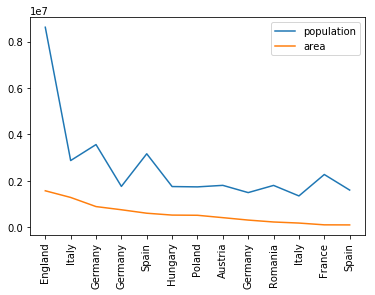

In [18]:
%matplotlib inline

orig_city_frame = city_frame.drop(columns=['cum_population'])

orig_city_frame.plot(xticks=range(len(orig_city_frame.index)),
                     use_index=True, 
                     rot=90)